In [ ]:
# Work 04
## Applying written functions to calculate mask properties, both geometric attributes and spectral features
## Selecting images (randomly) for further labelling
## Writing function to interpret masks and labelling
## For detailed label information, please see the folder 'lables_of_masks'

In [26]:
# loading libraries
import torch
torch.cuda.empty_cache() 
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:100000"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
os.getcwd()
import glob
import shapely
from shapely.geometry import Polygon
import shapely.plotting
import pandas as pd
from PIL import Image as ima
import warnings
from pathlib import Path

In [29]:
# loading written functions
from mtp_function_yl import *

In [30]:
# loading data of accident locations
koord  = pd.read_csv('/home/yelhe/script/mt/output/koord.csv')
# loading GSV images 
name1 = koord.Nr.astype(str) + '1.jpg'
name2 = koord.Nr.astype(str) + '2.jpg'
name3 = koord.Nr.astype(str) + '3.jpg'
name4 = koord.Nr.astype(str) + '4.jpg'
gsv_image1 = []
gsv_image2 = []
gsv_image3 = []
gsv_image4 = []
nf1 = []
nf2 = []
nf3 = []
nf4 = []
for i in range(0,349):
    path1 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name1[i])
    c1 = path1.is_file()
    path2 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name2[i])
    c2 = path2.is_file()
    path3 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name3[i])
    c3 = path3.is_file()
    path4 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name4[i])
    c4 = path4.is_file()
    if c1 is True:
        im1 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name1[i])
        im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
        gsv_image1.append(im1)
        nf1.append(name1[i])
    if c2 is True:
        im2 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name2[i])
        im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
        gsv_image2.append(im2)
        nf2.append(name2[i])
    if c3 is True:
        im3 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name3[i])
        im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
        gsv_image3.append(im3)
        nf3.append(name3[i])
    if c4 is True:
        im4 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name4[i])
        im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)
        gsv_image4.append(im4)
        nf4.append(name4[i])

In [32]:
# loading filtered mask output
n1 = [s.replace('.jpg', '') for s in nf1]
n2 = [s.replace('.jpg', '') for s in nf2]
n3 = [s.replace('.jpg', '') for s in nf3]
n4 = [s.replace('.jpg', '') for s in nf4]
mask1f = []
mask2f = []
mask3f = []
mask4f = []
for i in range(0,295):
    m1 = np.load('/home/yelhe/data/gsv_output_filtered/' + n1[i] + 'f.npy', allow_pickle=True)
    mask1f.append(m1)
    m2 = np.load('/home/yelhe/data/gsv_output_filtered/' + n2[i] + 'f.npy', allow_pickle=True)
    mask2f.append(m2)
    m3 = np.load('/home/yelhe/data/gsv_output_filtered/' + n3[i] + 'f.npy', allow_pickle=True)
    mask3f.append(m3)
    m4 = np.load('/home/yelhe/data/gsv_output_filtered/' + n4[i] + 'f.npy', allow_pickle=True)
    mask4f.append(m4)
# print(len(mask1f), len(mask2f), len(mask3f), len(mask4f))

0


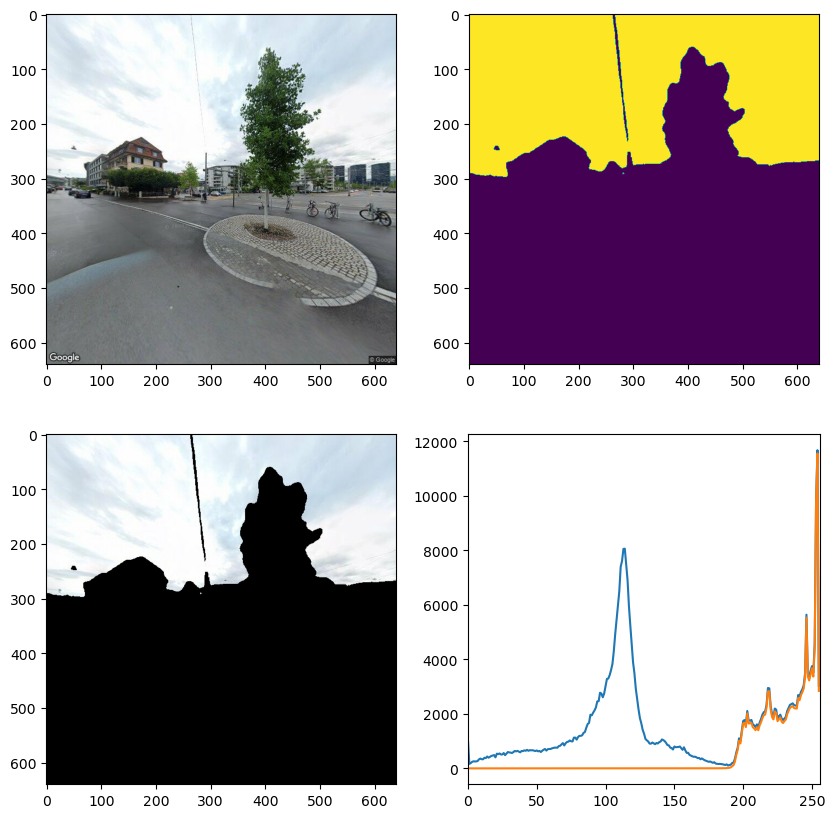

In [53]:
# checking each mask and interpret with original GSV image
# j = 0
# j = j+1
mb = mask1f[j]
img = gsv_image1[j]

# i = 0
# i = i+1
print(i)
maskedimg = cv2.bitwise_and(img,img,mask = mb[i])
# create a mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mb[i],[256],[0,256])
plt.figure(figsize = (10,10))
plt.subplot(221), plt.imshow(img)
plt.subplot(222), plt.imshow(mb[i])
plt.subplot(223), plt.imshow(maskedimg)
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

In [427]:
# select the first 10 locations to label, which is 10*4 GSV images in total
# apply the written function to calculate mask properties
df1 = []
df2 = []
df3 = []
df4 = []
for i in range(0, 10):
    df1.append(feature_summary(gsv_image1[i], mask1f[i]))
    df2.append(feature_summary(gsv_image2[i], mask2f[i]))
    df3.append(feature_summary(gsv_image2[i], mask2f[i]))
    df4.append(feature_summary(gsv_image2[i], mask2f[i]))

In [ ]:
# checking each mask and interpret with original GSV image and image histogram
t = 0
# the following df = df1/df2/df3/df4
p = ((df[j]).iloc[t]['mask']) -1
# print(t, p)
i = p
#i = 0
print(i, t,'label')
maskedimg = cv2.bitwise_and(img,img,mask = mb[i])
# create a mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mb[i],[256],[0,256])
plt.figure(figsize = (10,10))
plt.subplot(221), plt.imshow(img)
plt.subplot(222), plt.imshow(mb[i])
plt.subplot(223), plt.imshow(maskedimg)
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

In [430]:
# preparing for labelling, setting the 'Nr'
for i in range(0, 10):
    df1[i] = df1[i].assign(Nr = n1[i])
    df2[i] = df2[i].assign(Nr = n2[i])
    df3[i] = df3[i].assign(Nr = n3[i])
    df4[i] = df4[i].assign(Nr = n4[i])
# correspondence between i and 'Nr' of selected accident locations
# 0  99900060852597
# 1  99900063018611
# 2  99900052723510
# 3  99900061514043
# 4  99900063037843
# 5  99900054288209
# 6  99900046662300
# 7  99900063992212
# 8  99900060164616
# 9  99900049507279

In [432]:
# manual labeling
df1[0] = df1[0].assign(label = ['s', 'pa', 's', 'p', 'r', 'b', 'p', 'p',
                                'bi', 'bi', 'b', 'o', 't', 'b', 'bi', 'b',
                                'b', 'p', 'b', 'v', 'b', 'v', 'p', 'ct',
                                'b', 'p', 'o', 'p', 'o', 'bi', 'p', 'v',
                                'p', 'v', 'h', 'curb', 'o', 'ep', 'o', 'ct',
                                'o',  'curb'])
df1[1] = df1[1].assign(label = ['s', 'r', 'r', 'p', 't', 'p', 'p', 'o',
                                'p', 'r', 'p', 'o', 'p', 'o', 'p', 'h',
                                'pa', 'r', 'o', 'm', 'p', 'p', 'o', 'o', 
                                'o', 'p', 'o','o', 't',  'p', 'o', 'o',
                                'p', 'p', 't', 'r', 'r',  'o', 'rs', 'o',  
                                'rgs', 'p', 'p', 'o', 'p', 'o', 'p', 'o', 
                                'p', 'sl', 'o', 'o', 'sl','o', 'o', 'o',
                                'o', 'ct', 'o'])
df1[2] = df1[2].assign(label = ['r', 's', 'p', 'p', 'b', 't', 'r', 's', 
                                'b', 'p', 'b', 'p', 'p', 'o', 'v', 'p', 
                                'o', 'b', 'b', 'b', 'p', 'vp', 'v', 'b',
                                'p', 'v', 'p', 'b', 'p', 'b', 'p', 'p',
                                'p', 'o', 'p', 'p', 'curb', 'p', 'o', 'vp', 
                                'o', 'v', 'v'])
df1[3] = df1[3].assign(label = ['s', 'r', 's', 'p', 'v', 'o', 'v', 'rgs', 
                                'v', 'p', 'v', 'o', 'v', 'p', 'p', 'o', 
                                'p', 'o', 'p', 'rgs', 'p', 'b', 'o', 'p', 
                                'p', 'p', 'v', 'p', 'p', 'rgs', 'p', 'p', 
                                'o', 'p', 'o', 'o', 'o', 'p', 'o', 'v', 
                                'o', 'rgs', 'o', 'o', 'p', 'p', 'o', 'o', 
                                'v', 't', 'o', 'o', 'mo', 'p', 'p', 'o', 
                                'o', 'o', 'sl'])
df1[4] = df1[4].assign(label = ['s', 'r', 'p', 'v', 'b', 'p', 'p', 'vp', 
                                'rgs', 'p', 'p', 't', 'p', 'r', 'o', 'p', 
                                'pa', 'o', 'rs', 'p', 'p', 'o', 'o', 'rs', 
                                'p', 'p', 'p', 'o', 'o', 'p', 'vp', 'o', 
                                'o', 'o', 'o', 'rs', 'rs', 'o', 'p', 'm', 
                                'vp', 'vp', 'o', 'p', 'vp'])
df1[5] = df1[5].assign(label = ['s', 'b', 's', 'bw', 't', 'ra', 't', 'o', 
                                'b', 'pa', 'o', 'o', 'b', 'o', 'p', 'o', 
                                'o', 'o', 'o', 'o', 'b', 'o', 'o', 'o', 
                                'o', 'o', 'o'])
df1[6] = df1[6].assign(label = ['v', 'b', 'pa', 'b', 'b', 's', 'v', 'p', 
                                'b', 'b', 'curb', 'o', 't', 'p', 'v', 'v', 
                                'rs', 'o', 'rgs', 'o', 'p', 'o', 'vp', 'o', 
                                'o', 'o', 'rs', 'o', 'p', 'p', 'o', 'o', 
                                'o', 'p', 'o', 'o', 'v', 'v', 'vp', 'o', 
                                'sl', 'vp', 'o', 'b', 'p', 'b', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'v'])
df1[7] = df1[7].assign(label = ['b', 'r', 's', 'b', 'm', 'o', 'o', 'o', 
                                'p', 'o', 'o', 'o', 'r', 'o', 'o', 'b', 
                                'o', 'p', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'b', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'b', 'o', 'p', 'o', 'o', 'p', 'o', 'o', 
                                'p', 'v', 'o', 'v', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'o', 'v', 
                                'o', 'v', 'o', 'b'])
df1[8] = df1[8].assign(label = ['s', 'b', 'r', 'pa', 'o', 'o', 'p', 'o',  
                                'p', 't', 'curb', 'p', 'p', 'p', 'o', 'o', 
                                'ct', 'o', 'p', 'o', 'o', 'p', 'ct', 'p', 
                                'p', 'o', 'p', 's', 'o', 'o', 'ct', 'b'])
df1[9] = df1[9].assign(label = ['s', 'r', 'o', 'b', 'bus', 'rgs', 't', 'r',
                                'p', 'm', 'rgs', 'o', 'p', 'curb', 'o', 'o',
                                'o', 'p', 'rgs', 'sl', 'h', 'rgs', 'o', 'o', 
                                'rgs', 'p', 'o', 't', 'h', 'o', 'p', 't',  
                                'o', 'rgs', 'p', 'rgs', 'o', 'p', 'h', 'ep', 
                                'o', 'sw', 'h', 'o', 'o', 'o', 'o', 'o', 
                                'h', 'ep', 'b', 'o', 'o', 'o', 'o', 'o', 
                                'h', 'o', 'o', 'o'])



df2[0] = df2[0].assign(label = ['r', 'pa', 's', 'p', 'b', 'b', 'b', 't',
                                's', 'bi', 'p', 'bi', 'pa', 'o','v', 'pa',
                                'p', 'pa','b','o', 'p','ep', 'bi', 'p',
                                'b', 'b', 'p', 'bi','p', 'p', 'ct', 'bi',
                                'curb', 'b', 'b', 'bi', 'b', 'pa','ep', 'o',
                                'o','o', 'o','o'])
df2[1] = df2[1].assign(label = ['s', 'r', 'p', 's', 'r', 'p','t', 'b', 
                                'b', 'r', 'curb', 'sw', 'curb', 'o', 'o','o',
                                'rgs', 'o', 'o', 'b', 'o', 'p', 'sl', 'o',
                                'rs', 'o', 'sl','p', 'o', 'o', 'o', 'o',
                                'rs', 'p'])
df2[2] = df2[2].assign(label = ['s', 'b', 'r', 'b', 'rgs', 'v', 'b', 'rgs',
                                'rgs', 't', 'p', 'rgs', 's', 'p', 'p', 'o',
                                's', 'pa', 'rgs', 'pa', 'pa', 'p', 'p', 'b',
                                'pa', 'pa', 'rgs', 'o', 'p', 'o', 'b', 'b',
                                'p', 'o', 'p', 'curb', 'sl', 'b', 'p', 'b', 
                                'p', 'pa', 'vp', 'p', 'rgs', 'o', 'rs', 'rgs',
                                'p', 'o', 'p', 'p', 'p', 'rgs', 'o', 'b',
                                'ct', 'o', 'p', 'p'])
df2[3] = df2[3].assign(label = ['s', 'r', 'p', 'p', 'o', 'v', 'p', 't',  
                                'p', 'rgs', 'v', 'p', 'o', 'o', 'vp', 'o',
                                'b', 'v', 'rgs', 'v', 'b', 'o', 'rgs', 'vp',
                                'o', 'o', 'o', 'o', 'o', 'o', 'p', 'b',
                                'p', 'rgs', 'o', 'o', 'o', 'o', 'v', 'o',
                                'o', 'o', 'rgs', 'o', 'o', 'o'])
df2[4] = df2[4].assign(label = ['b', 's', 'v', 'b', 'p', 'r', 'r', 'b', \
                                'vp', 'b', 'p', 'o', 'v', 'p', 's', 't', 
                                'pa', 'p', 'v', 'o', 'p', 'o', 'o', 'o', 
                                'o', 'p', 'b', 'r', 'p', 'pa', 'o', 'vp', 
                                'o', 'o', 'p', 'b', 'p', 'p', 'v', 'o', 
                                'o', 'o', 'b', 'o'])
df2[5] = df2[5].assign(label = ['r', 's', 'ra', 'ra', 'ra', 'bw', 'o', 'o', 
                                'b', 'bw', 'bw', 'bw', 'o', 'v', 'o', 'o', 
                                'o', 'o', 'v', 'o', 'o', 'b', 'curb', 'o', 
                                'b', 'sw', 'o', 'o', 'curb', 'v', 'o', 'o', 
                                'sw', 'o', 'v', 'o', 'o', 'o', 'sw', 'o', 
                                'o', 'o', 'v', 'o' ])
df2[6] = df2[6].assign(label = ['b', 'r', 'b', 's', 'o', 'o', 'o', 't', 
                                'o', 'o', 'o', 't', 'o', 'o', 'p', 'o', 
                                'o', 'p', 'o', 'o', 'o', 'v', 'o', 'o', 
                                'b', 'p', 'p', 'o', 'o', 'o', 'vp', 'o', 
                                'o', 'o', 'p', 'o', 'o', 'o', 'o', 'p', 
                                'vp', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o'])
df2[7] = df2[7].assign(label = ['s', 'r', 'm', 'p', 'train', 's', 'o', 'o', 
                                'train', 'o', 't', 'o', 'o', 'b', 'b', 'o', 
                                'o', 'o', 'o', 'o', 'b', 'o', 'o', 'o', 
                                'o', 'b', 'o', 'o', 'o', 'o', 'o', 'b', 
                                'o', 'o', 'o', 'pa', 'curb', 'o', 'o', 'o', 
                                'sl', 'm', 'o', 'o', 'o', 'o', 'o', 'p', 
                                'ra', 'r', 'o', 'o', 'pa', 'o', 'b', 'o', 
                                'o', 'o', 'p', 'o', 'o', 'o', 'o', 'sw', 
                                'o', 'o', 'o', 'o', 'o', 'p', 'train', 'o', 
                                'o', 'o', 'm', 'o', 'o', 'o', 'o', 'o'])
df2[8] = df2[8].assign(label = ['s', 'b', 'r', 'o', 'o', 't', 'pa', 'rgs',
                                'p', 'p', 'pa', 'rgs', 'rgs', 'o', 'p', 'ct',
                                'rgs', 'p', 'p', 'p', 'rgs', 'p', 'pa', 'p',
                                'o', 'o', 'p', 'o', 'o', 'p', 'curb', 'v',
                                'o', 'rs', 'p', 'sl', 'rgs', 'o', 'b', 'p',
                                'rgs', 'rgs', 'o', 'o'])
df2[9] = df2[9].assign(label = ['s', 'r', 'o', 'p', 'b', 'o', 'r', 'o',
                                't', 'o', 'r', 'b', 'p', 'b', 'p', 'o',
                                'o', 'curb', 'rgs', 'p', 'm', 'curb', 'b', 'o',
                                'h', 'o', 'p', 'o', 'o', 'o', 'b', 'b',
                                'h', 'o', 'h', 'o', 'o', 'o', 'o', 'o',
                                'o', 'ep', 'b', 'sw', 'sw', 'rgs', 'o', 'o',
                                'o', 'sw', 'o'])


df3[0] = df3[0].assign(label = ['r', 's', 'b', 'pa', 'o', 'm', 'b', 'v',
                                't', 'o', 'o', 'o', 'o', 'o', 'b','o',
                                'o', 'o', 'b', 'o', 'o', 'o', 'post_mailbox', 'p',
                                'b', 'b', 'p', 'p', 'o', 'pa', 'o', 'o',
                                'vp', 'p', 'p', 'o', 'o', 'sw', 'ep', 'ep', 
                                'sw', 'b'])
df3[1] = df3[1].assign(label = ['s', 'p', 'p', 'r', 'p', 't', 'p', 'r',
                                'r', 'b', 'r', 'sw', 'r', 'p', 'sl', 'r', 
                                'o', 'curb', 'rgs', 'ep', 'o', 'rgs', 'p', 'p' ])
df3[2] = df3[2].assign(label = ['s', 'b', 'rgs', 'r', 'r', 'r', 'rgs', 's', 
                                'p', 'rgs', 'p', 'rgs', 'rgs', 'p', 'h', 'p', 
                                'b', 'o', 'p', 'b', 'o', 'p', 'curb', 'curb', 
                                'o', 'pa', 'o', 'o', 'o', 'b', 'o', 'vp', 
                                'o', 'b', 'o', 'p', 'o', 'o', 'o', 'o', 
                                'o', 'o', 'p', 'p', 'b', 'b', 'v', 'pa', 
                                'b', 'vp', 'o', 'p', 'v', 'o', 'o', 'o', 
                                'o', 'o'])
df3[3] = df3[3].assign(label = ['s', 'r', 'p', 'v', 'o', 'v', 'v', 'p', 
                                'p', 'v', 'vp', 'vp', 't', 'p', 'vp', 'vp', 
                                'vp', 'v', 'o', 'rgs', 'vp', 'p', 't', 'o', 
                                'o', 'curb', 'vp', 'p', 'vp', 'o', 'o', 's', 
                                'p', 'p', 'p', 'o', 't', 'o', 'o' ])
df3[4] = df3[4].assign(label = ['s', 'r', 'b', 'pa', 't', 'p', 'v', 'p', 
                                'p', 'm', 'm', 'p', 'p', 'curb', 'p', 'p', 
                                'm', 'bp', 'm', 'p', 'm', 'p', 's', 'p', 
                                'b', 'p', 'mb', 'p', 'b', 'o', 'p', 'b', 
                                'v', 'o', 'p', 'p', 'p', 'o', 'sl' ])
df3[5] = df3[5].assign(label = ['s', 's', 'b', 'b', 'b', 'b', 'r', 'b', 
                                'v', 'o', 'b', 'o', 'o', 'o', 'o', 'ra', 
                                'o', 'v', 'o', 'v', 'o', 'b', 'o', 'v', 
                                'v', 'o', 'o', 'o', 'h', 'o', 'o', 'v' ])
df3[6] = df3[6].assign(label = ['pa', 'b', 'b', 'v', 'v', 'r', 'p', 'b', 
                                'b', 'b', 'o', 'o', 'o', 'o', 't', 'v', 
                                'p', 'o', 'o', 'o', 'p', 'o', 'b', 'o', 
                                'b', 'o', 'o', 'vp', 'v', 'o', 's', 'o', 
                                'o', 'o', 'o', 'o', 'o', 'o', 'v', 'p', 
                                'o', 'p', 'o', 'o', 'o', 'b', 'o', 'o', 
                                'o', 'o', 'v', 'o', 'vp'])
df3[7] = df3[7].assign(label = ['s', 'r', 'b', 'train', 'o', 'o', 'o', 't', 
                                'pa', 'train', 'b', 'o', 'o', 'm', 'b', 'o', 
                                'o', 'o', 'o', 'o', 'b', 'p', 'o', 'o', 
                                'o', 'b', 'o', 'p', 'sw', 'b', 'o', 'sw', 
                                'o', 'o', 'p', 'o'])
df3[8] = df3[8].assign(label = ['r', 's', 'b', 'b', 't', 't', 'p', 'pa', 
                                'o', 'o', 'p', 'o', 'p', 'p', 'o', 'p', 
                                'p', 'b', 'b', 'p', 't', 'o', 'p', 'rgs', 
                                'rgs', 'p', 'o', 'p', 'p', 'o', 'o', 'p', 
                                'p', 'p', 'rs', 'p', 'o', 'curb', 'b', 'p', 
                                'b', 'o', 'o', 'p', 'rgs', 'o'])
df3[9] = df3[9].assign(label = ['r', 's', 'b', 'p', 'b', 't', 'r', 'b', 
                                'b', 'b', 'b', 'ts', 'b', 'b', 'r', 't',
                                'b', 'b', 'rgs', 'o', 't', 'o', 'b', 'o', 
                                'o', 'b', 'curb', 'o', 'b', 'p', 'b', 'o', 
                                'p', 'p', 'p', 'b', 'o' ])


df4[0] = df4[0].assign(label = ['s', 'r', 'pa', 'p', 'b', 'b', 'p', 'b', 
                                't', 'o', 'o', 'v', 'm', 'b', 'p', 'v', 
                                'p', 'b', 'o', 'p', 'v', 'o', 'o', 'p', 
                                'o', 'o', 'b', 'b', 'p', 'pa', 'o', 'o', 
                                'p', 'o', 'o', 'o', 'o'])
df4[1] = df4[1].assign(label = ['s', 'o', 'p', 'o', 'p', 'm', 'o', 'o', 
                                'v', 'p', 'o', 'p', 'm', 'p', 'p', 'o', 
                                'p', 'p', 'p', 'o', 'h', 'o', 'p', 'p', 
                                'm', 'o', 'b', 'o', 'o', 'p', 'p', 'o', 
                                'rgs', 'rgs', 'r', 'p', 'p', 'p', 'o', 'o', 
                                'rs', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'ct', 'o'])
df4[2] = df4[2].assign(label = ['r', 's', 'p', 't', 's', 'p', 'p', 'b', 
                                'b', 'b', 'b', 'p', 'o', 'p', 'b', 'b', 
                                'b', 'p', 'p', 'p', 'o', 'b', 'h', 'p', 
                                'p', 'p', 'p', 'b', 'p', 'o', 'h', 'o', 
                                'b', 'o', 'ep', 'o', 'p', 'v', 'o', 'o', 
                                'b', 'o'])
df4[3] = df4[3].assign(label = ['r', 'v', 'v', 's', 'v', 'vp', 'vp', 'p', 
                                'rgs', 'rgs', 'p', 't', 'p', 'p', 'b', 'o', 
                                'v', 'vp', 'vp', 'curb', 'o', 'p', 'o', 'vp', 
                                'o', 'vp', 'o', 'p', 'vp', 'o', 'p', 'o', 
                                'o', 'rs', 'o', 'o', 'o', 'o', 'o', 'o', 
                                'o', 'p', 'sl', 'ep', 'o'])
df4[4] = df4[4].assign(label = ['s', 'pa', 's', 'p', 'r', 't', 'r', 'm', 
                                'p', 'p', 'p', 'o', 'p', 'p', 'p', 'p', 
                                'p', 'm', 'o', 'm', 'p', 'o', 'pa', 'p', 
                                'p', 'o', 'p', 'p', 'p', 'rgs', 'p', 'm', 
                                'o', 'm', 'r', 'r', 'p', 'p', 'rgs', 'o', 
                                'o', 'sl', 'p', 'p', 'p', 'o', 'p', 'p', 
                                'sl', 'o', 'o', 'p', 'pa', 'rs'])
df4[5] = df4[5].assign(label = ['s', 'b', 'r', 'ra', 'b', 'ra', 'o', 'bw', 
                                'bw', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 
                                'sw', 'b', 'o', 'o', 'curb', 'b', 'o', 'o', 
                                'curb', 'sw'])
df4[6] = df4[6].assign(label = ['v', 'b', 's', 'b', 'v', 'r', 'b', 'v', 
                                'r', 'rgs', 'vp', 'vp', 'b', 'vp', 'v', 'v', 
                                'v', 'v', 't', 'v', 'v', 'p', 'sl', 'vp', 
                                'rs', 'sl', 'o', 'o', 'v', 'vp', 'o'])
df4[7] = df4[7].assign(label = ['r', 's', 'b', 'train', 'pa', 'o', 'b', 'b', 
                                't', 'b', 'b', 'b', 'o', 'v', 'o', 'o', 
                                'b', 'v', 'p', 'o', 'b', 'o', 'p', 'sw', 
                                'v', 'o', 'o', 'curb', 'o', 'o', 'o', 'sl', 
                                'b', 'o', 'o', 'o', 'p'])
df4[8] = df4[8].assign(label = ['s', 'o', 'r', 'b', 'o', 'p', 'p', 'o', 
                                'p', 'pa', 't', 'p', 'p', 'o', 'p', 'rs', 
                                'p', 'p', 'p', 'p', 't', 'o', 'p', 'rgs', 
                                'p', 'o', 'p', 'p', 'p', 'p', 'rs', 'pa', 
                                'p', 'p', 'o', 'p', 'm', 'rgs', 'o', 'p', 
                                'p', 'rgs', 'rs', 'rgs', 'p', 'o', 'o', 'o', 
                                'o', 'o'])
df4[9] = df4[9].assign(label = ['s', 'train', 'r', 'b', 'r', 'b', 't', 'b', 
                                'p', 'o', 'b', 'curb', 'rgs', 'r', 'v', 'p', 
                                'p', 'o', 'o', 'v', 'b', 'o', 'r', 'o', 
                                'o', 'o', 'sl', 'p', 'curb', 'o', 'curb', 'b', 
                                'o', 'o', 'p', 'b', 'o', 'o', 'o', 'o', 
                                'sl', 'o', 'rgs', 'b', 'curb', 'o', 'o', 'h', 
                                'o', 'sw', 't', 'o', 'rgs', 'o', 'o', 'o', 
                                'sw', 'rgs', 'o', 'sw', 'o', 'o', 'o'])

1 999000630186111


In [ ]:
# summarising masks with a label of curb together and checking statistics
df_curb = pd.DataFrame()
for i in range(0,10):
    dfi = df1[i]
    dfic = dfi.loc[dfi['label'] == 'curb']
    df_curb = pd.concat([df_curb, dfic])
for i in range(0,10):
    dfi = df2[i]
    dfic = dfi.loc[dfi['label'] == 'curb']
    df_curb = pd.concat([df_curb, dfic])
for i in range(0,10):
    dfi = df3[i]
    dfic = dfi.loc[dfi['label'] == 'curb']
    df_curb = pd.concat([df_curb, dfic])
for i in range(0,10):
    dfi = df4[i]
    dfic = dfi.loc[dfi['label'] == 'curb']
    df_curb = pd.concat([df_curb, dfic])

# summarising all masks into one dataframe for further analysis
df_all = pd.DataFrame()
for i in range(0, 10):
    dfi1 = df1[i]
    dfi2 = df2[i]
    dfi3 = df3[i]
    dfi4 = df4[i]
    df_all = pd.concat([df_all, dfi1, dfi2, dfi3, dfi4])
    print(i)
df_curb.to_csv('/home/yelhe/script/mt/0_curb.csv', index = False)
df_all.to_csv('/home/yelhe/script/mt/df_all_0.csv', index = False)


In [ ]:
# select randomly 10 numbers from 0 - 295
ra = list(range(0, 295))
il = random.sample(ra, 10)
print(il)
# il = [283, 193, 38, 224, 27, 66, 174, 77, 160, 182]
# using the random numbers to select its corresponding 'Nr' for accident locations
nlist = pd.DataFrame()
nlist['n1'] = n1 # notice that nl is not n1, the first one is letter l, and the second one is the number 1. 
nlist['n'] = nlist.n1.str[-15:-1]
nlist = nlist.drop(['n1'], axis=1)
nlist_s = nlist.iloc[il]
# correspondence between random number and 'Nr' of selected accident locations
# 283 99900046541031
# 193 99900058252952
# 38 99900050934899
# 224 99900052420710
# 27 99900046484531
# 66 99900056647155
# 174 99900048160516
# 77 99900055778422
# 160 99900051076121
# 182 99900062245276

In [ ]:
# preparing for labelling
r1 = nlist_s.n.astype(str) + '1'
r2 = nlist_s.n.astype(str) + '2'
r3 = nlist_s.n.astype(str) + '3'
r4 = nlist_s.n.astype(str) + '4'
r1 = [str(element) for element in r1]
r2 = [str(element) for element in r2]
r3 = [str(element) for element in r3]
r4 = [str(element) for element in r4]
# loading filtered mask output of these randomly selected locations
mr1f = []
mr2f = []
mr3f = []
mr4f = []
for i in range(0,10):
    m1 = np.load('/home/yelhe/script/mt/random/' + r1[i] + 'f.npy', allow_pickle=True)
    mr1f.append(m1)
    m2 = np.load('/home/yelhe/script/mt/random/' + r2[i] + 'f.npy', allow_pickle=True)
    mr2f.append(m2)
    m3 = np.load('/home/yelhe/script/mt/random/' + r3[i] + 'f.npy', allow_pickle=True)
    mr3f.append(m3)
    m4 = np.load('/home/yelhe/script/mt/random/' + r4[i] + 'f.npy', allow_pickle=True)
    mr4f.append(m4)
# print(len(mr1f), len(mr2f), len(mr3f), len(mr4f))

In [ ]:
# apply the written function to calculate mask properties
df1r = []
df2r = []
df3r = []
df4r = []
for i in range(0, 10):
    a = il[i]
    print(i, a)
    df1r.append(feature_summary(gsv_image1[a], m1f[a]))
    df2r.append(feature_summary(gsv_image2[a], m2f[a]))
    df3r.append(feature_summary(gsv_image3[a], m3f[a]))
    df4r.append(feature_summary(gsv_image4[a], m4f[a]))

In [ ]:
# preparing for labelling, setting the corresponding 'Nr'
for i in range(0, 10):
    a = il[i]
    df1r[i] = df1r[i].assign(Nr = n1[a])
    df2r[i] = df2r[i].assign(Nr = n2[a])
    df3r[i] = df3r[i].assign(Nr = n3[a])
    df4r[i] = df4r[i].assign(Nr = n4[a])
    print(i, a)

In [ ]:
# Manual labelling
dfr1[0] = dfr1[0].assign(label = ['s', 'tram', 'r', 'rgs', 'p', 'v', 'tram', 'b',
                                  'pa', 'rgs', 'rgs', 'p', 'p', 'rgs', 'rgs', 'o',
                                  'rgs', 'v', 'p', 'rgs', 'o', 'rgs', 'p', 'p', 
                                  'rs', 'v', 'sl', 'ep', 'o', 'h', 'o', 'o', 
                                  'o', 'rgs', 'p', 'ep', 'ep', 'o', 'sw', 'sw',
                                  'p', 'o', 'o', 'p', 'sl', 'o', 'o', 'vp', 
                                  'o', 'o', 'p', 'ep', 'sw'])
dfr1[1] = dfr1[1].assign(label = ['o', 'r', 's', 'o', 'b', 'b', 'b', 'o',
                                  'p', 'b', 'o', 'p', 'b', 'b', 'b', 'o',
                                  'o', 'o', 'o', 'o', 'h', 'o', 't', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'h', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'h', 
                                  'h', 'h', 'o', 'o', 'h', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'p', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o'])
dfr1[2] = dfr1[2].assign(label = ['pa', 'b', 's', 'b', 'bl', 't', 'o', 'b', 
                                  'r', 'rgs', 'b', 'rgs', 't', 'rgs', 'rgs', 'r', 
                                  'pa', 'o', 'b', 'o', 'rgs', 'b', 'p', 'p', 
                                  'p', 'rgs', 'o', 'p', 'p', 'p', 'p', 'p', 
                                  'p', 'o', 'p', 'o', 'rgs', 'p', 'o', 'rgs', 
                                  'rgs', 'z', 'b', 'sw', 'p', 'rgs', 'p', 'o', 
                                  'rs', 'o', 'o', 'sw', 'rgs', 'p'])
dfr1[3] = dfr1[3].assign(label = ['v', 'p', 'b', 'r', 'p', 'o', 'p', 'sp',
                                  'o', 'p', 't', 'p', 'pa', 'o', 'p', 'b', 
                                  'rgs', 'b', 'p', 'rs', 'o', 'o', 'o', 'o',
                                  'o', 'b', 'b', 'p', 'vp', 'o', 'o', 'b', 
                                  'ri', 'p', 'o', 'b', 'curb', 'o', 'p', 'b',
                                  'p', 'o', 'b', 'o', 'o', 'sw', 'ri', 'o',
                                  'sw', 'vp', 'o', 'o', 'b', 'b', 'b', 'b',
                                  'b', 'sw'])
dfr1[4] = dfr1[4].assign(label = ['s', 'r', 'p', 's', 'p', 'o', 'rs', 'p', 
                                  'p', 't', 'pa', 'p', 'p', 'b', 'rgs', 'p', 
                                  'p', 'p', 'p', 't', 'b', 'rgs', 'rgs', 'sl', 
                                  'rgs', 'rgs', 'bp', 'o', 'rgs', 'o', 'rs', 'rgs', 
                                  'rgs', 'o', 'o', 'v', 'b', 'mo', 'b', 'p', 
                                  'p', 'b', 'p', 'o', 'rgs'])
dfr1[5] = dfr1[5].assign(label = ['r', 'r', 'b', 'bp', 'bp', 'bp', 'bp', 'o', 
                                  'bp', 'bp', 'bp', 'bp', 'bp', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o'])
dfr1[6] = dfr1[6].assign(label = ['b', 'r', 'p', 's', 'p', 'v', 'p', 'p', 
                                  'r', 'b', 'o', 'bip', 'o', 'bl', 'b', 'vp', 
                                  'b', 'bi', 'p', 'b', 'bl', 'rgs', 'bip', 'o', 
                                  'p', 'p', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'h', 'sp', 'pa', 'sp', 'o', 'v', 'p', 
                                  'o', 'o', 'p', 'pa', 'o', 'b', 'o', 'sw', 
                                  'o', 'o', 'o', 'o', 'o', 'o'])
dfr1[7] = dfr1[7].assign(label = ['r', 'rb', 'r', 'o', 'o', 'pa', 'b', 'rs', 
                                  'o', 'o', 'o', 'bip', 'bp', 'bip', 'o', 'bp', 
                                  'r', 't', 'o', 'bip', 'o', 'o', 'bip', 'o', 
                                  'o', 'v', 'o', 'o', 'o', 'o', 'o', 'rgs', 
                                  'o', 'o', 'o', 'sh', 'o', 'bip', 'bip', 'o', 
                                  'bip', 't', 'o', 'o', 'o', 'bi', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'bp', 'o'])
dfr1[8] = dfr1[8].assign(label = ['r', 's', 'o', 'o', 'pa', 'curb', 'b', 'o', 
                                  'o', 't', 't', 'o', 'o', 'b', 'o', 'o', 
                                  'b', 'rgs', 'mo', 'o', 'sp', 'o', 'curb', 'o', 
                                  'o', 'o', 'curb', 'p', 'o', 'o', 'o', 'sl', 
                                  'o', 'o', 'o', 'o', 'm', 'b', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'b', 'o', 'rgs', 'o', 
                                  'o', 'o'])
dfr1[9] = dfr1[9].assign(label = ['s', 'b', 'b', 'b', 'b', 'p', 'b', 'p', 
                                  'v', 'o', 'r', 'o', 'tb', 'b', 'rgs', 'rgs', 
                                  'o', 'o', 'o', 'o', 'o', 'p', 'rgs', 't', 
                                  'o', 'o', 'v', 'o', 'o', 'o', 'o', 'mb', 
                                  'o', 'p', 'p', 'mb', 'v', 'o', 'p', 'o', 
                                  'tl', 'o', 'mb', 'p', 'o', 'h', 'o', 'o', 
                                  'o', 'sw', 'o', 'o', 'o', 'tl'])

dfr2[0] = dfr2[0].assign(label = ['s', 'tram', 'rgs', 's', 'r', 'rgs', 'b', 'r', 
                                  'b', 'b', 'rp', 'v', 'rgs', 'pa', 'b', 'rgs', 
                                  'o', 'tram', 'p', 'p', 'bus', 'o', 'rgs', 'b', 
                                  'p', 'h', 'p', 'sl', 'o', 'rgs', 'o', 'rgs', 
                                  'pa', 'rp', 'sw', 'o', 'o', 'rgs', 'o', 'p', 
                                  'ep', 'o', 'tram', 'o', 'o', 'sw', 'rs', 'o', 
                                  'tb', 'rgs', 'o', 'v', 'p', 'curb', 'o', 'o'])
dfr2[1] = dfr2[1].assign(label = ['s', 'r', 'p', 'b', 'o', 'p', 'h', 'p', 
                                  'o', 'p', 'o', 'o', 'h', 'p', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'h', 'o', 
                                  'p', 'p', 'b', 'o', 'o', 'b', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'b', 'o', 'o', 'v', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'p', 'o'])
dfr2[2] = dfr2[2].assign(label = ['s', 'b', 'rgs', 'b', 'rgs', 'rgs', 'rgs', 'rgs', 
                                  'o', 'pa', 'rgs', 'p', 'rgs', 'pa', 'b', 'p', 
                                  'rgs', 'rp', 'o', 'b', 'o', 'sp', 'o', 'p', 
                                  'wp', 'pa', 'p', 'pa', 'z', 'o', 'b', 'p', 
                                  'o', 'p', 'p', 'p', 'b', 'o', 'v', 'o', 
                                  'p', 'm', 'b', 'rp', 'p', 'pa', 'p', 'p', 
                                  'p', 'p', 'o', 'o', 'o', 'p', 'p', 'p', 
                                  'sw', 'o', 'bp', 'o', 'sl', 'sw', 'p', 'sw', 
                                  'curb', 'z', 'sh', 'sh', 'z', 'p', 'o', 'o', 
                                  'o', 'sh'])
dfr2[3] = dfr2[3].assign(label = ['b', 'r', 'r', 's', 'v', 'rgs', 'b', 'b', 
                                  't', 'b', 'b', 'b', 'o', 'o', 'o', 'o', 
                                  'vp', 'vp', 'r', 'o', 'o', 'o', 'o', 'm', 
                                  'o', 'o', 'o', 'o', 'o', 'sw', 'sw', 'b', 
                                  'o', 'o', 'o', 'o', 'sw'])
dfr2[4] = dfr2[4].assign(label = ['s', 'r', 's', 'p', 't', 'sl', 'p', 'vp', 
                                  'rgs', 'o', 'rgs', 'pa', 'b', 'p', 'o', 'ch', 
                                  'rgs', 'p', 'o', 'b', 'p', 'o', 'b', 'curb',
                                  'rgs', 'v', 'o', 'o', 'vp', 'p', 'o', 'o', 
                                  'o', 'o', 'p', 'pa', 'ep', 'v', 'rgs', 'b', 
                                  'b', 'sl'])
dfr2[5] = dfr2[5].assign(label = ['s', 'r', 'b', 'b', 't', 'b', 'p', 'b', 
                                  'bp', 'b', 'v', 'rgs', 'r', 'o', 'v', 'b', 
                                  'mb', 'bp', 'bp', 'bp', 'b', 'sl', 'o', 'sl', 
                                  'p', 'sw', 'o', 'o', 'b', 'b', 'sw', 'p', 
                                  'p', 'o', 'o', 'rs', 'o', 'o', 'o', 'p', 
                                  'p', 'p', 'bip', 'o', 'o', 'b', 'o', 'bi', 
                                  'b'])
dfr2[6] = dfr2[6].assign(label = ['r', 'p', 's', 'o', 'o', 't', 'r', 'bip', 
                                  'b', 'p', 'bip', 'b', 'o', 'o', 'p', 'v', 
                                  'vp', 'bi', 'o', 'p', 'o', 'o', 'vp', 'p', 
                                  'rgs', 'p', 'o', 'o', 'p', 'o', 'p', 'o', 
                                  'h', 'o', 'o', 'curb', 'o', 'o', 'p', 't', 
                                  'o', 'o', 'o', 'p', 'p', 'b', 'p', 'o', 
                                  'o', 'o', 'p', 'p', 'o', 'o', 'o', 'curb', 
                                  'o', 'o', 'p', 'o', 'o', 'p', 'o', 'p', 
                                  'o', 'o', 'o', 'p', 'o', 'o', 'o', 'p', 
                                  'o', 'p', 'o', 'o', 'p', 'ct'])
dfr2[7] = dfr2[7].assign(label = ['r', 'rb', 's', 'r', 'rb', 'li', 'o', 'rp', 
                                  'rb', 'o', 'p', 'o', 'sl', 'o', 'o', 'li', 
                                  'o', 'li', 'li', 'v', 'li', 'rgs', 'rgs', 'o', 
                                  'o', 'rgs', 'h', 'o', 'bp', 'o', 'o', 'v', 
                                  'o', 'bi', 'vp', 'o', 'o', 'sl', 't', 'o', ])
dfr2[8] = dfr2[8].assign(label = ['r', 's', 'pa', 'p', 'b', 'ts', 'rgs', 't', 
                                  't', 'o', 'o', 'o', 'o', 'curb', 'o', 'o', 
                                  'p', 'rgs', 'o', 'ts', 'ep', 'o', 'o', 'm', 
                                  'mo', 'o', 'o', 'o', 'o', 'h', 'o'])
dfr2[9] = dfr2[9].assign(label = ['s', 'b', 'b', 'b', 'o', 'b', 'b', 'rgs', 
                                  'o', 'o', 'v', 'tb', 'o', 'rgs', 'o', 'bw', 
                                  'b', 'o', 'rgs', 'o', 'o', 'o', 'tc', 'pa', 
                                  'p', 'tl', 'm', 'b', 'o', 'rgs', 'rgs', 'rgs', 
                                  'vp', 'o', 'o', 'o', 'o', 'pa', 'o', 'o', 
                                  'o', 'rgs', 'sw', 'pa', 'h', 'p', 'o', 'rs', 
                                  'tl', 'o', 'tl', 'o', 'rp', 'o', 'rgs', 'o', 
                                  'tlp', 'o', 'o', 'o'])

dfr3[0] = dfr3[0].assign(label = ['r', 's', 'rgs', 'lp', 'v', 't', 'rp', 'o', 
                                  'b', 'v', 'pa', 'ri', 'p', 'vp', 'rgs', 'lp', 
                                  'p', 'p', 's', 'pa', 'p', 't', 'sw', 'mo', 
                                  'b', 'o', 'p', 'v', 'p', 'o', 'ri', 'tl', 
                                  'vp', 'mo', 'sl', 'o', 'v', 'sw', 'o', 'rgs', 
                                  'o', 'o', 'o', 'rgs', 'sl', 'rgs', 'rgs', 'sl'])
dfr3[1] = dfr3[1].assign(label = ['s', 'o', 'r', 'p', 'o', 'b', 'o', 'o', 
                                  'b', 'b', 'o', 'o', 'o', 'o', 'o', 'b', 
                                  'bp', 'o', 'o', 'h', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'h', 'o', 'o', 
                                  'h', 'o', 'h', 'o', 'h', 'o', 'o', 'o', 
                                  'o', 'h', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'r', 'o', 'o', 'h', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o'])
dfr3[2] = dfr3[2].assign(label = ['s', 'b', 'p', 'rgs', 'rgs', 'rgs', 't', 'b', 
                                  'b', 'sl', 'sh', 'rp', 'rp', 'b', 'p', 'rgs', 
                                  'b', 'sp', 'o', 'o', 'z', 'p', 'o', 'o', 
                                  'o', 'o', 'pa', 'o', 'sl', 'o', 'pa', 'r', 
                                  'o', 'curb', 'p', 'rgs', 'rs', 'b', 'pa', 'rs', 
                                  'p', 'wp', 'rgs', 'p', 'o', 'curb', 'o', 't', 
                                  'rgs', 'sh', 'o', 'o', 'o', 'rgs', 'sp', 'rgs', 
                                  'o', 'o', 'pa', 'o', 'sw', 'rgs', 'sw', 'v', 
                                  'lp', 'rgs', 'sw', 'pa', 'sw', 'rgs', 'o', 'b', 
                                  'p', 'sw', 'o', 'r', 'o', 'o' ])
dfr3[3] = dfr3[3].assign(label = ['b', 's', 'r', 'pa', 'p', 'rgs', 'p', 'p', 
                                  'o', 'o', 'o', 'b', 'b', 'p', 'm', 'b', 
                                  'lp', 'v', 'b', 'b', 'b', 'p', 'p', 'o', 
                                  'o', 'p', 'o', 'rgs', 'o', 'p', 'o', 'o', 
                                  'o', 'sw', 'o', 'o', 'o', 'o'])
dfr3[4] = dfr3[4].assign(label = ['s', 'r', 'b', 'p', 'p', 'p', 'b', 'p', 
                                  'b', 'pa', 'bp', 'bp', 'pa', 'o', 'm', 'curb', 
                                  'mo', 'o', 'b', 'p', 'rgs', 'p', 'rgs', 'rgs', 
                                  'rgs', 'm', 'o', 'b', 'rs', 'p', 'b', 'o', 
                                  'lp', 'sl', 'sl', 'o', 'o', 'm', 'z'])
dfr3[5] = dfr3[5].assign(label = ['s', 'tram', 'r', 'r', 's', 'b', 'b', 'b', 
                                  'v', 'mo', 'b', 'p', 'p', 'p', 'v', 'p', 
                                  'v', 'p', 'p', 'vp', 'p', 'mo', 'pa', 'r', 
                                  'bp', 'sw', 'sp', 'p', 'p', 'o', 'sw', 'wp', 
                                  'p', 'rgs', 'sw', 'o', 'pa', 'p', 'p', 'o', 
                                  'pa', 'o'])
dfr3[6] = dfr3[6].assign(label = ['s', 'v', 'r', 'bl', 'b', 'p', 't', 'v', 
                                  'o', 's', 'p', 'p', 'o', 'pa', 'o', 'rgs', 
                                  'p', 'p', 'o', 'o', 'vp', 'p', 'p', 'p', 
                                  'o', 'o', 'p', 'o', 'p', 'o', 'o', 'o', 
                                  'o', 'vp', 'p', 'p', 'o', 'p', 'p', 'p', 
                                  'p', 'p', 'p', 'h', 'o', 'o', 'p', 'p', 
                                  'o', 'o', 'o', 'p', 'p', 'p', 'o', 'sw', 
                                  'sp', 'rs', 'p'])
dfr3[7] = dfr3[7].assign(label = ['rb', 'o', 'rb', 'r', 'rb', 's', 'o', 'o', 
                                  'o', 'o', 'pa', 'o', 'o', 'o', 'o', 'o', 
                                  'mb', 'li', 'o', 'li', 'o', 'li', 'o', 'p', 
                                  't', 'o', 'bip', 'o', 'o', 'bi', 'v', 'o', 
                                  'bi', 'bip', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o'])
dfr3[8] = dfr3[8].assign(label = ['s', 'r', 'p', 'o', 't', 't', 'o', 'o', 
                                  'o', 'b', 'o', 'p', 'p', 'sp', 'b', 'b', 
                                  'rgs', 'tl', 'tb', 'curb', 'o', 'o', 'rgs', 'pa', 
                                  'pa', 'o', 'curb', 'b', 'o', 'h', 'o', 'o', 
                                  'sl', 'o', 'o', 'o', 'o', 'p', 'o', 'b', 
                                  'rgs', 'o', 'rgs', 'o', 'h'])
dfr3[9] = dfr3[9].assign(label = ['o', 'r', 'b', 's', 'o', 'bw', 'o', 'o', 
                                  'o', 'm', 'r', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'p', 'o', 'o', 'o', 'o', 'o', 
                                  'tl', 'o', 'o', 'p', 'pa', 'o', 'o', 'tl', 
                                  'tl', 'o', 'o'])


dfr4[0] = dfr4[0].assign(label = ['r', 's', 'v', 's', 'p', 'v', 'vp', 't', 
                                  'v', 'v', 'mo', 'ri', 'v', 'rgs', 'p', 'p', 
                                  'p', 'rgs', 'p', 'lp', 'rgs', 'rgs', 'lp', 'rgs', 
                                  'p', 'o', 'vp', 'o', 'o', 'sl', 'o', 'v', 
                                  'rgs', 'o', 'sw', 'rgs', 'o'])
dfr4[1] = dfr4[1].assign(label = ['s', 'o', 'o', 'o', 'r', 'b', 'b', 'o', 
                                  'o', 'o', 'b', 'h', 'o', 't', 'o', 'o', 
                                  'h', 'o', 'o', 'o', 'o', 'b', 'b', 'o', 
                                  'o', 'o', 'o', 'o', 'h', 'h', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'm', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'h', 'o', 
                                  'o', 'o', 'o', 'o', 'b', 'o', 'o', 'o', 
                                  'o', 'h', 'sl', 'o', 'o', 'o', 'o', 'h', 
                                  'o', 'h', 'o', 'o', 'h', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 
                                  'o', 'o', 'o', 'h', 'o', 'h', 'o', 'o', 
                                  'o'])
dfr4[2] = dfr4[2].assign(label = ['b', 's', 'r', 's', 'bl', 'b', 'pa', 'p', 
                                  'o', 'pa', 't', 'v', 'b', 'p', 'st', 'p', 
                                  'p', 'p', 'p', 'p', 'rs', 'p', 'o', 'p', 
                                  'o', 'rgs', 'p', 'rgs', 'rp', 'p', 't', 'o', 
                                  'o', 'o', 'rgs', 'p', 'o', 'o', 'p'])
dfr4[3] = dfr4[3].assign(label = ['p', 'r', 'p', 'p', 'o', 't', 'p', 't', 
                                  'b', 'p', 'p', 'o', 'pa', 'o', 'm', 'b', 
                                  'p', 'sp', 'p', 'pa', 'b', 'p', 'p', 'b', 
                                  'p', 'o', 'ri', 'p', 'rgs', 'o', 'o', 'b', 
                                  'p', 'b', 'o', 'b', 'p', 'ri', 'p', 'b', 
                                  'b', 'p', 'li', 'p', 'b', 'b', 'b', 'o', 
                                  'o', 'tc', 'b'])
dfr4[4] = dfr4[4].assign(label = ['s', 'r', 'p', 'p', 'rs', 'o', 'p', 'p', 
                                  'o', 'rs', 'p', 'b', 'p', 'pa', 'rs', 'p', 
                                  'ct', 'p', 'rs', 'p', 'o', 'o', 'o', 'm', 
                                  'p', 'p', 'mo', 'b', 'p', 'rgs', 'o', 'p', 
                                  'p', 'o', 'o', 'rgs', 'o', 'tc', 'o', 'p', 
                                  'sl', 'p', 'p', 'p', 'bp', 'b', 'sw', 'o', 
                                  'b', 'o', 'tc', 'sl', 'sl'])
dfr4[5] = dfr4[5].assign(label = ['b', 's', 'b', 'b', 'tram', 'rgs', 'rgs', 's', 
                                  'rgs', 'rgs', 'rgs', 'o', 'p', 'pa', 'v', 'mo', 
                                  'b', 'rgs', 'rgs', 't', 'rgs', 'curb', 'm', 'o', 
                                  'tram', 'o', 'rgs', 'o', 'rgs', 'm', 'p', 'pa', 
                                  'b', 'o', 'b', 'rgs', 'rgs', 'b', 'rgs', 'o', 
                                  'sw', 'p', 'o', 'lp', 'o', 'h', 'o', 'o', 
                                  'o', 't', 'vp', 'sw', 'o'])
dfr4[6] = dfr4[6].assign(label = ['p', 'v', 'b', 'b', 'r', 'b', 's', 'v', 
                                  'p', 'rgs', 'rgs', 'p', 't', 'p', 'b', 'p', 
                                  'p', 'p', 'p', 'vp', 'sh', 'o', 'bl', 'vp', 
                                  'o', 'o', 'vp', 'bl', 'pa', 'sw', 'o', 'p', 
                                  'o', 'st', 'o', 'o', 'o', 'rgs'])
dfr4[7] = dfr4[7].assign(label = ['rb', 'o', 'o', 'o', 'o', 'r', 'rb', 'o', 
                                  'bip', 'bi', 'o', 'o', 'o', 'o', 'sh', 'o', 
                                  'li', 'o', 'o', 'sh', 'r', 'li', 'bi', 'o', 
                                  'o', 'o', 'o', 'o', 'o', 'o', 'bi', 'o', 
                                  'o', 'b', 'o', 'o', 'o', 'bip', 'o', 'o', 
                                  'o', 'o', 'o', 'o', 'bip', 'o', 'o', 'o', 
                                  'bi', 'o', 'v', 'o', 'o', 'p', 'o', 'o', 
                                  'o', 'o'])
dfr4[8] = dfr4[8].assign(label = ['r', 's', 'r', 'pa', 'o', 'curb', 't', 'tb', 
                                  'o', 'o', 'p', 'rgs', 'o', 'o', 'pa', 'o', 
                                  'pa', 'b', 'h', 'rs', 'o', 'o', 'b', 'b', 
                                  'o', 'curb', 'o', 'b', 'o', 'o', 'p', 'b', 
                                  'b', 'v', 'o', 'o', 'v'])
dfr4[9] = dfr4[9].assign(label = ['b', 'b', 's', 'b', 'b', 'r', 'b', 'o', 
                                  'b', 'b', 'b', 'o', 'p', 'p', 'o', 'pa', 
                                  'o', 'v', 'o', 'b', 'o', 'o', 'rgs', 'o', 
                                  'o', 'o', 'o', 'o', 'tb', 'o', 'o', 'v', 
                                  'o', 'o', 'o', 'vp', 'mb', 'o', 'b'])

In [ ]:
# summarising all masks with the label of curb and checking statistics
dfr_curb = pd.DataFrame()
for i in range(0,10):
    dfi = dfr1[i]
    dfic = dfi.loc[dfi['label'] == 'curb']
    dfr_curb = pd.concat([dfr_curb, dfic])
for i in range(0,10):
    dfi = dfr2[i]
    dfic = dfi.loc[dfi['label'] == 'curb']
    dfr_curb = pd.concat([dfr_curb, dfic])
for i in range(0,10):
    dfi = dfr3[i]
    dfic = dfi.loc[dfi['label'] == 'curb']
    dfr_curb = pd.concat([dfr_curb, dfic])
for i in range(0,10):
    dfi = dfr4[i]
    dfic = dfi.loc[dfi['label'] == 'curb']
    dfr_curb = pd.concat([dfr_curb, dfic])
# summarising all masks into one dataframe for further analysis
dfr_all = pd.DataFrame()
for i in range(0, 10):
    dfi1 = dfr1[i]
    dfi2 = dfr2[i]
    dfi3 = dfr3[i]
    dfi4 = dfr4[i]
    dfr_all = pd.concat([dfr_all, dfi1, dfi2, dfi3, dfi4])
    print(i)
dfr_curb.to_csv('/home/yelhe/script/mt/r_curb.csv', index = False)
dfr_all.to_csv('/home/yelhe/script/mt/df_all_r.csv', index = False)
